# Explore dataset

In [10]:
import os
from pathlib import Path

# Get HOME dir
root = Path(os.path.expanduser("~"))
project_dir = f"{root}/github/llm-drug-discovery"
project_dir

'/home/mgustineli/github/llm-drug-discovery'

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split


# Load the dataset
df = pd.read_csv(f"{project_dir}/data/heart_failure_clinical_records_dataset.csv")

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Information:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Explore categorical variables
print("\nCategorical Variables Distribution:")
categorical_cols = [
    "anaemia",
    "diabetes",
    "high_blood_pressure",
    "sex",
    "smoking",
    "DEATH_EVENT",
]
for col in categorical_cols:
    print(f"\n{col} distribution:")
    print(df[col].value_counts())
    print(f"{col} percentage:")
    print(df[col].value_counts(normalize=True) * 100)

# Explore numerical variables
print("\nNumerical Variables Distribution:")
numerical_cols = [
    "age",
    "creatinine_phosphokinase",
    "ejection_fraction",
    "platelets",
    "serum_creatinine",
    "serum_sodium",
    "time",
]

Dataset Shape: (299, 13)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int


Potential Trial Eligibility Criteria Ranges:
                    Feature      Min       Max           Mean    Median  \
0                       age     40.0      95.0      60.833893      60.0   
1  creatinine_phosphokinase     23.0    7861.0     581.839465     250.0   
2         ejection_fraction     14.0      80.0      38.083612      38.0   
3                 platelets  25100.0  850000.0  263358.029264  262000.0   
4          serum_creatinine      0.5       9.4       1.393880       1.1   
5              serum_sodium    113.0     148.0     136.625418     137.0   
6                      time      4.0     285.0     130.260870     115.0   

         Q1        Q3  
0      51.0      70.0  
1     116.5     582.0  
2      30.0      45.0  
3  212500.0  303500.0  
4       0.9       1.4  
5     134.0     140.0  
6      73.0     203.0  

Data preprocessing complete. Files saved to /home/mgustineli/github/llm-drug-discovery/data/
Visualizations saved to /home/mgustineli/github/llm-drug-discovery/

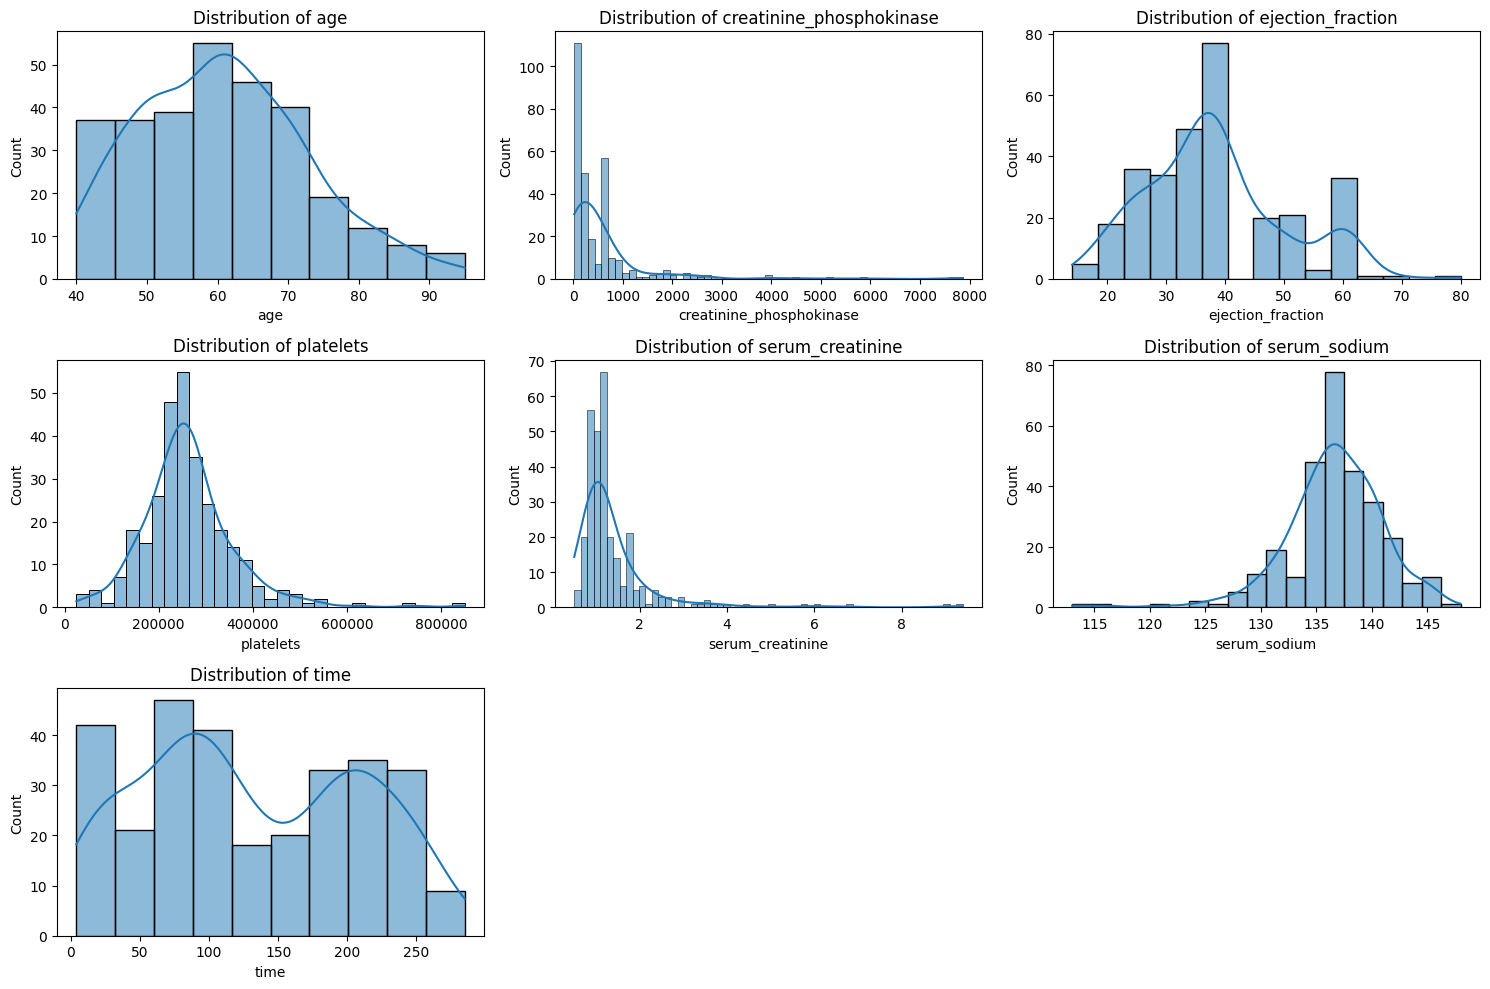

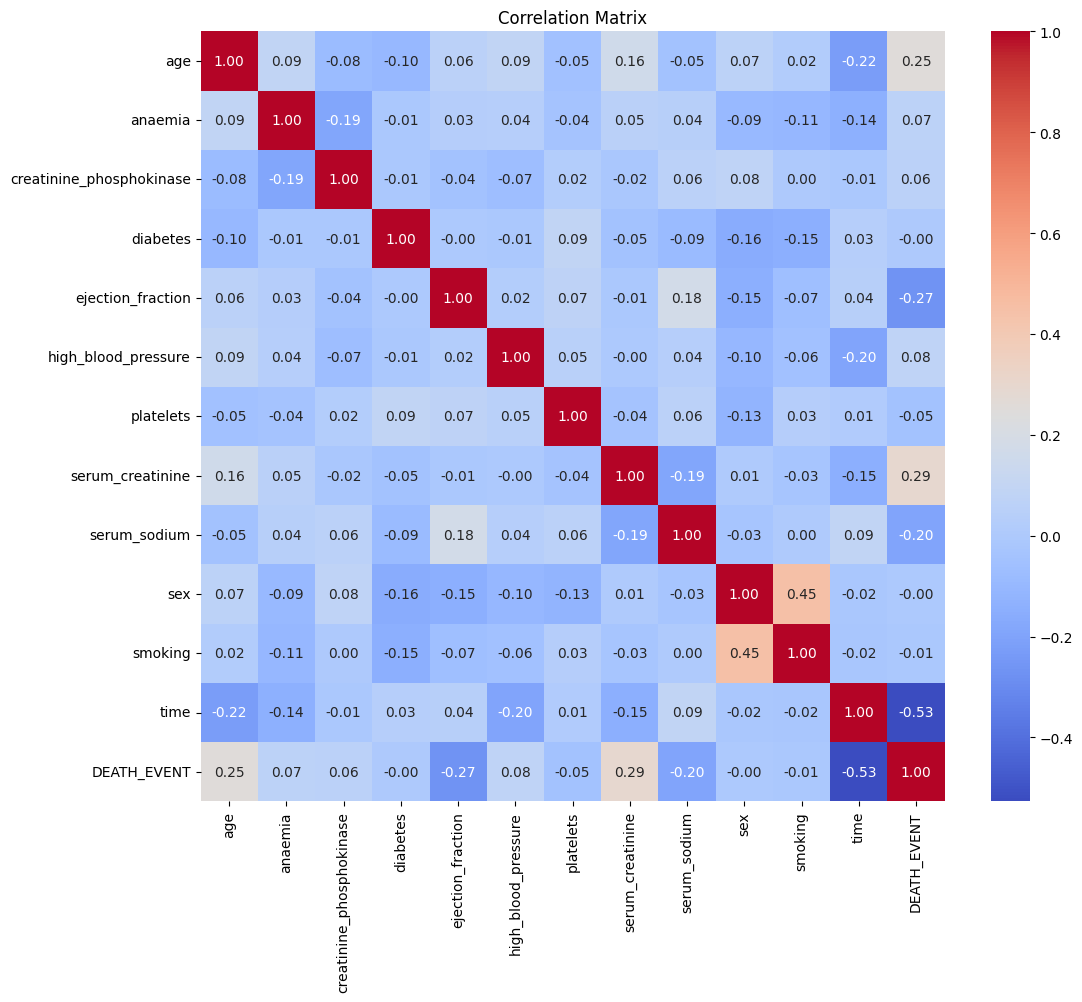

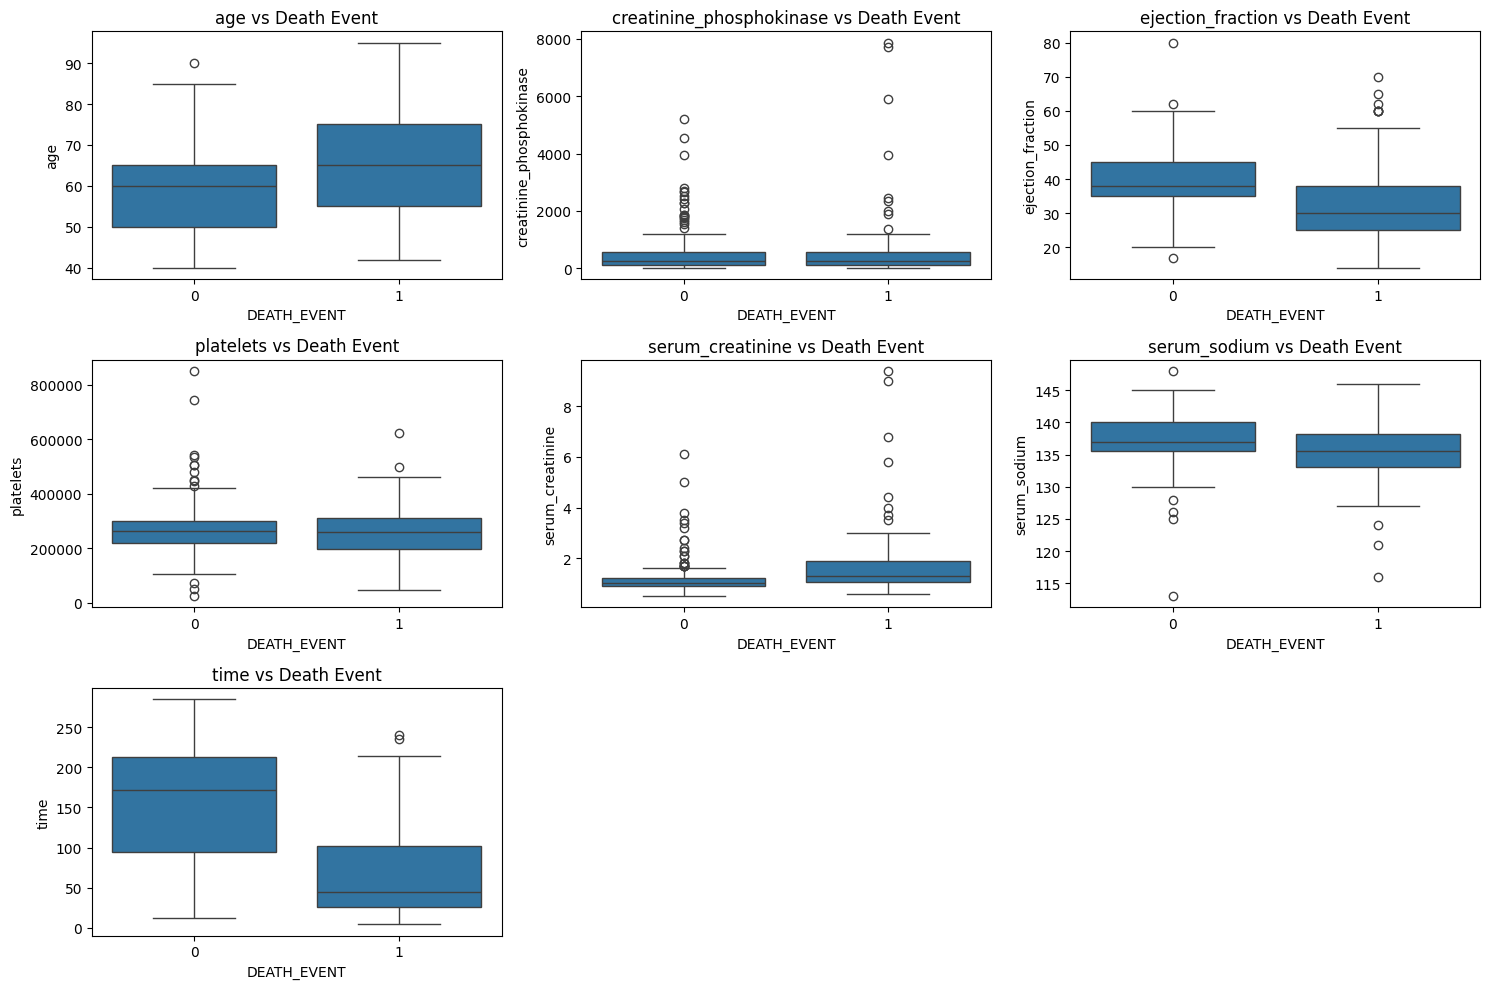

In [12]:
# Create a directory for plots
os.makedirs(f"{project_dir}/plots", exist_ok=True)

# Plot histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.savefig(f"{project_dir}/plots/numerical_distributions.png")

# Plot correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig(f"{project_dir}/plots/correlation_matrix.png")

# Explore relationship between variables and death event
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x="DEATH_EVENT", y=col, data=df)
    plt.title(f"{col} vs Death Event")
plt.tight_layout()
plt.savefig(f"{project_dir}/plots/numerical_vs_death.png")

# Create a summary dataframe for potential trial eligibility criteria
print("\nPotential Trial Eligibility Criteria Ranges:")
criteria_summary = pd.DataFrame(
    {
        "Feature": numerical_cols,
        "Min": [df[col].min() for col in numerical_cols],
        "Max": [df[col].max() for col in numerical_cols],
        "Mean": [df[col].mean() for col in numerical_cols],
        "Median": [df[col].median() for col in numerical_cols],
        "Q1": [df[col].quantile(0.25) for col in numerical_cols],
        "Q3": [df[col].quantile(0.75) for col in numerical_cols],
    }
)
print(criteria_summary)

# Save the criteria summary
criteria_summary.to_csv(f"{project_dir}/data/criteria_summary.csv", index=False)

# Prepare data for modeling (to be used later)
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Save processed data for later use
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
train_data.to_csv(f"{project_dir}/data/train_data.csv", index=False)
test_data.to_csv(f"{project_dir}/data/test_data.csv", index=False)

print(f"\nData preprocessing complete. Files saved to {project_dir}/data/")
print(f"Visualizations saved to {project_dir}/plots/")